In [1]:
from pyspark.sql import SparkSession 

In [5]:
spark = SparkSession.builder.appName("IntroApp").getOrCreate()

df = spark.read.option("inferSchema","true").csv("datasets/points.txt")
#df.printSchema()

df = df.withColumnRenamed("_c0","X")
df = df.withColumnRenamed("_c1","Y")
df.show(2)

df = df.withColumn("Z",(df["X"]+df["Y"]))
df.show(3)

+---+---+
|  X|  Y|
+---+---+
|  5|  5|
| 15| 17|
+---+---+
only showing top 2 rows

+---+---+---+
|  X|  Y|  Z|
+---+---+---+
|  5|  5| 10|
| 15| 17| 32|
| 15| 16| 31|
+---+---+---+
only showing top 3 rows



In [8]:
spark = SparkSession.builder.appName("IntroApp2").getOrCreate()

df = spark.read.option("inferSchema","true").option("delimiter","\t").option("header","true").csv("datasets/DepremVerileri-2019-Nisan.txt")
df = df.select("Olus tarihi","xM","Yer")
df = df.sort("xM","Olus tarihi",ascending=False)
df = df.drop("Yer")
df = df.filter( (df["xM"] > 5) & (df["xM"] < 5.5) )
df.show()

+-----------+---+
|Olus tarihi| xM|
+-----------+---+
| 2019.02.20|5.4|
| 2018.04.24|5.4|
| 2017.02.06|5.4|
| 2016.12.20|5.4|
| 2015.12.26|5.4|
| 2015.10.06|5.4|
| 2012.08.05|5.4|
| 2011.11.08|5.4|
| 2011.10.27|5.4|
| 2011.06.23|5.4|
| 2010.11.03|5.4|
| 2009.12.22|5.4|
| 2007.08.25|5.4|
| 2005.01.10|5.4|
| 2004.07.01|5.4|
| 2003.07.26|5.4|
| 2001.06.23|5.4|
| 1999.11.12|5.4|
| 1996.08.14|5.4|
| 1995.02.14|5.4|
+-----------+---+
only showing top 20 rows



In [10]:
spark = SparkSession.builder.appName("App3").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("delimiter","\t")\
        .option("header","true")\
        .csv("datasets/DepremVerileri-2019-Nisan.txt")
df.createOrReplaceTempView("deprem")
newDF = spark.sql("select Enlem,Boylam,xM,Yer from deprem where xM>7")
newDF = newDF.sort("xM",ascending = False)
newDF.show()

+-------+------+---+--------------------+
|  Enlem|Boylam| xM|                 Yer|
+-------+------+---+--------------------+
|   39.8| 39.51|7.9|KURUTILEK- (ERZIN...|
|  36.54| 27.33|7.7|ONIKI ADALAR (AKD...|
|  37.98| 44.48|7.6|T�RKIYE-IRAN SINI...|
|  39.05| 44.04|7.5|YENIYAKA-CALDIRAN...|
|  40.76| 29.97|7.4|BASISKELE (KOCAEL...|
|   40.6|  27.2|7.3|ERIKLICE-SARKOY (...|
|  40.74| 31.21|7.2|UGUR- (DUZCE) [No...|
|  39.99| 27.36|7.2|SOGUCAK-YENICE (�...|
|  35.41|  27.2|7.2|             AKDENIZ|
|  41.05| 33.72|7.2|COMERT-ILGAZ (�AN...|
|  41.41| 32.69|7.2|INCECAY-SAFRANBOL...|
|38.7212|43.411|7.2|YEMLICE- (VAN) [N...|
|  40.67|  31.0|7.1|GUZELDERE-GOLYAKA...|
|  36.42| 28.68|7.1|             AKDENIZ|
|  40.27| 36.83|7.1|TEKNECIK-ALMUS (T...|
+-------+------+---+--------------------+



In [13]:
#Null Values

from pyspark.sql import SparkSession 
from pyspark.ml.feature import Imputer

spark = SparkSession.builder.appName("App4").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("delimiter",",")\
        .csv("datasets/points-null-values.txt")

df = df.withColumn("x1",df["_c0"]).withColumn("y1",df["_c1"])
df = df.withColumn("x2",df["_c0"]).withColumn("y2",df["_c1"])
df = df.withColumn("x3",df["_c0"]).withColumn("y3",df["_c1"])
df = df.fillna(0,["x1","y1"])
df = df.withColumn("x2",df["x2"].cast("float"))
df = df.withColumn("y2",df["y2"].cast("float"))
df = df.withColumn("x3",df["x3"].cast("float"))
df = df.withColumn("y3",df["y3"].cast("float"))

imputer = Imputer(strategy = "mean",inputCols = ["x2","y2"],outputCols = ["x2","y2"])
imputerMedian = Imputer(strategy = "median",inputCols = ["x3","y3"],outputCols = ["x3","y3"])

df = imputer.fit(df).transform(df)
df = imputerMedian.fit(df).transform(df)
df.show()

+----+----+---+---+-------+---------+-----+-----+
| _c0| _c1| x1| y1|     x2|       y2|   x3|   y3|
+----+----+---+---+-------+---------+-----+-----+
|   5|   5|  5|  5|    5.0|      5.0|  5.0|  5.0|
| 105| 107|105|107|  105.0|    107.0|105.0|107.0|
| 105| 106|105|106|  105.0|    106.0|105.0|106.0|
|null|   6|  0|  6|56.5625|      6.0|  8.0|  6.0|
|   6|   6|  6|  6|    6.0|      6.0|  6.0|  6.0|
| 106|null|106|  0|  106.0|59.764706|106.0|106.0|
|   7|   7|  7|  7|    7.0|      7.0|  7.0|  7.0|
|null|null|  0|  0|56.5625|59.764706|  8.0|106.0|
| 107| 107|107|107|  107.0|    107.0|107.0|107.0|
|   6|   7|  6|  7|    6.0|      7.0|  6.0|  7.0|
|   7|null|  7|  0|    7.0|59.764706|  7.0|106.0|
| 108| 108|108|108|  108.0|    108.0|108.0|108.0|
|   8|   6|  8|  6|    8.0|      6.0|  8.0|  6.0|
|null| 108|  0|108|56.5625|    108.0|  8.0|108.0|
|   5|   8|  5|  8|    5.0|      8.0|  5.0|  8.0|
| 107| 106|107|106|  107.0|    106.0|107.0|106.0|
|   8|   8|  8|  8|    8.0|      8.0|  8.0|  8.0|


In [16]:
#VectorAssembler

from pyspark.ml.feature import Imputer,VectorAssembler

spark = SparkSession.builder.appName("App5").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("delimiter",",")\
        .csv("datasets/points-places.txt")

vecA = VectorAssembler(inputCols = df.columns[1:],outputCol = "features")
df = vecA.transform(df)
df.show()

+--------+---+---+---+-----------------+
|     _c0|_c1|_c2|_c3|         features|
+--------+---+---+---+-----------------+
|  Ankara|  5|  5|  0|    [5.0,5.0,0.0]|
|Istanbul|105|  1|  1|  [105.0,1.0,1.0]|
|Istanbul|105|106|  1|[105.0,106.0,1.0]|
|  Ankara|  5|  6|  0|    [5.0,6.0,0.0]|
|   Izmir|  6|  6|  0|    [6.0,6.0,0.0]|
|  Ankara|106|106|  1|[106.0,106.0,1.0]|
|Istanbul|  7|  7|  0|    [7.0,7.0,0.0]|
|   Izmir|  7|  6|  0|    [7.0,6.0,0.0]|
|Istanbul|107|107|  1|[107.0,107.0,1.0]|
|Istanbul|  6|  7|  0|    [6.0,7.0,0.0]|
|   Izmir|  7|  8|  0|    [7.0,8.0,0.0]|
|  Ankara|108|108|  1|[108.0,108.0,1.0]|
|Istanbul|  8|  6|  0|    [8.0,6.0,0.0]|
|   Izmir|105|108|  1|[105.0,108.0,1.0]|
|Istanbul|  5|  8|  0|    [5.0,8.0,0.0]|
|  Ankara|107|106|  1|[107.0,106.0,1.0]|
|   Izmir|  8|  8|  0|    [8.0,8.0,0.0]|
|Istanbul|106|107|  1|[106.0,107.0,1.0]|
|  Ankara|107|108|  1|[107.0,108.0,1.0]|
|Istanbul|108|106|  1|[108.0,106.0,1.0]|
+--------+---+---+---+-----------------+



In [18]:
#StringIndexer&OneHotEncoder

from pyspark.ml.feature import VectorAssembler,StringIndexer,OneHotEncoder

spark = SparkSession.builder.appName("App6").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("delimiter",",")\
        .csv("datasets/points-places.txt")

strIndexer = StringIndexer(inputCol = "_c0",outputCol = "cityIndex")
df = strIndexer.fit(df).transform(df)
encoder = OneHotEncoder(inputCol = "cityIndex",outputCol = "encodedCity")
df= encoder.transform(df)
df = df.drop("cityIndex")
vecA = VectorAssembler(inputCols=df.columns[1:],outputCol="features")
df = vecA.transform(df)
df.show()

+--------+---+---+---+-------------+--------------------+
|     _c0|_c1|_c2|_c3|  encodedCity|            features|
+--------+---+---+---+-------------+--------------------+
|  Ankara|  5|  5|  0|(2,[1],[1.0])|[5.0,5.0,0.0,0.0,...|
|Istanbul|105|  1|  1|(2,[0],[1.0])|[105.0,1.0,1.0,1....|
|Istanbul|105|106|  1|(2,[0],[1.0])|[105.0,106.0,1.0,...|
|  Ankara|  5|  6|  0|(2,[1],[1.0])|[5.0,6.0,0.0,0.0,...|
|   Izmir|  6|  6|  0|    (2,[],[])| (5,[0,1],[6.0,6.0])|
|  Ankara|106|106|  1|(2,[1],[1.0])|[106.0,106.0,1.0,...|
|Istanbul|  7|  7|  0|(2,[0],[1.0])|[7.0,7.0,0.0,1.0,...|
|   Izmir|  7|  6|  0|    (2,[],[])| (5,[0,1],[7.0,6.0])|
|Istanbul|107|107|  1|(2,[0],[1.0])|[107.0,107.0,1.0,...|
|Istanbul|  6|  7|  0|(2,[0],[1.0])|[6.0,7.0,0.0,1.0,...|
|   Izmir|  7|  8|  0|    (2,[],[])| (5,[0,1],[7.0,8.0])|
|  Ankara|108|108|  1|(2,[1],[1.0])|[108.0,108.0,1.0,...|
|Istanbul|  8|  6|  0|(2,[0],[1.0])|[8.0,6.0,0.0,1.0,...|
|   Izmir|105|108|  1|    (2,[],[])|[105.0,108.0,1.0,...|
|Istanbul|  5|

+---+---+-----------+----------+
|  x|  y|   features|prediction|
+---+---+-----------+----------+
|  5|  5|  [5.0,5.0]|         0|
| 15| 17|[15.0,17.0]|         2|
| 15| 16|[15.0,16.0]|         2|
|  5|  6|  [5.0,6.0]|         0|
|  6|  6|  [6.0,6.0]|         0|
| 16| 16|[16.0,16.0]|         2|
|  7|  7|  [7.0,7.0]|         0|
|  7|  6|  [7.0,6.0]|         0|
| 17| 17|[17.0,17.0]|         2|
|  6|  7|  [6.0,7.0]|         0|
|  7|  8|  [7.0,8.0]|         0|
| 18| 18|[18.0,18.0]|         1|
|  8|  6|  [8.0,6.0]|         0|
| 15| 18|[15.0,18.0]|         2|
|  5|  8|  [5.0,8.0]|         0|
| 17| 16|[17.0,16.0]|         2|
|  8|  8|  [8.0,8.0]|         0|
| 16| 17|[16.0,17.0]|         2|
| 17| 18|[17.0,18.0]|         1|
| 18| 16|[18.0,16.0]|         2|
+---+---+-----------+----------+



[]

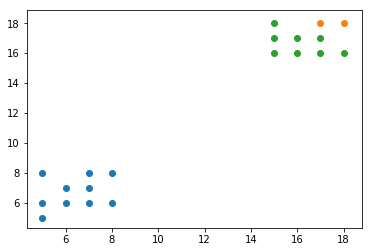

In [23]:
#Clustering & K-Means

from pyspark.ml.clustering import KMeans
from matplotlib import pyplot as plt

spark = SparkSession.builder.appName("KMeans App").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("delimiter",",")\
        .csv("datasets/points.txt")

df = df.withColumnRenamed("_c0","x").withColumnRenamed("_c1","y")

#xArr = df.select("x").rdd.map(lambda x: x[0]).collect()
#yArr = df.select("y").rdd.map(lambda x: x[0]).collect()
#plt.scatter(xArr,yArr)
#plt.plot()

vA = VectorAssembler(inputCols = ["x","y"],outputCol = "features")
df = vA.transform(df)
k = 3
km = KMeans().setK(k)
df = km.fit(df).transform(df)
df.show()

for i in range(k):
    x0 = df.filter(df["prediction"]==i).select("x").rdd.map(lambda x : x[0]).collect()
    y0 = df.filter(df["prediction"]==i).select("y").rdd.map(lambda x : x[0]).collect()
    plt.scatter(x0,y0)
plt.plot()

+----------+-----+----+------------+----------+
| Driver_ID|    x|   y|    features|prediction|
+----------+-----+----+------------+----------+
|3423311935|71.24|28.0|[71.24,28.0]|         2|
|3423313212|52.53|25.0|[52.53,25.0]|         2|
|3423313724|64.54|27.0|[64.54,27.0]|         2|
|3423311373|55.69|22.0|[55.69,22.0]|         2|
|3423310999|54.58|25.0|[54.58,25.0]|         2|
|3423313857|41.91|10.0|[41.91,10.0]|         1|
|3423312432|58.64|20.0|[58.64,20.0]|         2|
|3423311434|52.02| 8.0| [52.02,8.0]|         1|
|3423311328|31.25|34.0|[31.25,34.0]|         2|
|3423312488|44.31|19.0|[44.31,19.0]|         2|
|3423311254|49.35|40.0|[49.35,40.0]|         2|
|3423312943|58.07|45.0|[58.07,45.0]|         2|
|3423312536|44.22|22.0|[44.22,22.0]|         2|
|3423311542|55.73|19.0|[55.73,19.0]|         2|
|3423312176|46.63|43.0|[46.63,43.0]|         2|
|3423314176|52.97|32.0|[52.97,32.0]|         2|
|3423314202|46.25|35.0|[46.25,35.0]|         2|
|3423311346|51.55|27.0|[51.55,27.0]|    

[]

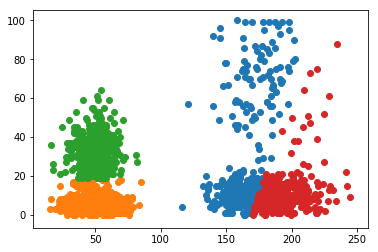

In [27]:
#KMeans-2

from pyspark.ml.clustering import KMeans,LDA,GaussianMixture

spark = SparkSession.builder.appName("KMeans App2").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("header","true")\
        .option("delimiter","\t")\
        .csv("datasets/data_1024.csv")

df = df.withColumnRenamed("Distance_Feature","x").withColumnRenamed("Speeding_Feature","y")
vA = VectorAssembler(inputCols = ["x","y"],outputCol = "features")
df = vA.transform(df)
k = 4
km = KMeans().setK(k)
df = km.fit(df).transform(df)
df.show()

for i in range(k):
    x0 = df.filter(df["prediction"]==i).select("x").rdd.map(lambda x : x[0]).collect()
    y0 = df.filter(df["prediction"]==i).select("y").rdd.map(lambda x: x[0]).collect()
    plt.scatter(x0,y0)
plt.plot()

In [30]:
#Classification

from pyspark.ml.classification import RandomForestClassifier,DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

spark = SparkSession.builder.appName("IRIS Classification App").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("header","true")\
        .option("delimiter",",")\
        .csv("datasets/iris-dataset.txt")

vA = VectorAssembler(inputCols =df.columns[0:-1], outputCol = "features" )
df = vA.transform(df)
df = df.select("features","class")
indexer = StringIndexer(inputCol = "class", outputCol = "label")
df = indexer.fit(df).transform(df)
df = df.select("features","label")
(trainDF,testDF) = df.randomSplit([0.75,0.25],seed = 1234)
rfClassifier = RandomForestClassifier()
modelDF = rfClassifier.fit(trainDF)
resultDF = modelDF.transform(testDF)
resultDF = resultDF.select("features","label","prediction")
evaluator = MulticlassClassificationEvaluator(metricName = "accuracy")
result = evaluator.evaluate(resultDF)
print("Accuracy: ",result)

Accuracy:  0.967741935483871


In [37]:
#TrainValidationSplit

from pyspark.ml.tuning import TrainValidationSplit,ParamGridBuilder

spark = SparkSession.builder.appName("IRIS Classification App2").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("header","true")\
        .option("delimiter",",")\
        .csv("datasets/iris-dataset.txt")

vA = VectorAssembler(inputCols= df.columns[0:-1],outputCol= "features")
df = vA.transform(df)
df = df.select("features","class")
indexer = StringIndexer(inputCol = "class",outputCol = "label")
df = indexer.fit(df).transform(df)
df = df.select("features","label")
(trainDF,testDF) = df.randomSplit([0.75,0.25],seed = 1234)
rfClassifier = RandomForestClassifier()
myEvaluator = MulticlassClassificationEvaluator(metricName = "accuracy")
myParams = ParamGridBuilder().addGrid(rfClassifier.numTrees,[1,2,3]).addGrid(rfClassifier.maxDepth,[1,2,3]).build()
validator = TrainValidationSplit(estimator = rfClassifier,estimatorParamMaps = myParams,trainRatio = 0.75,evaluator = myEvaluator)
bestModelRF = validator.fit(trainDF)
resultRF = bestModelRF.transform(testDF)
result = myEvaluator.evaluate(resultRF)
print("Accuracy: ", result)
print("Num Trees: ", bestModelRF.bestModel._java_obj.getNumTrees())
print("Max Depth: ", bestModelRF.bestModel._java_obj.getMaxDepth())
print("Impurity: ", bestModelRF.bestModel._java_obj.getImpurity())

Accuracy:  0.967741935483871
Num Trees:  1
Max Depth:  2
Impurity:  gini


In [38]:
#CrossValidation

from pyspark.ml.tuning import CrossValidator,ParamGridBuilder

spark = SparkSession.builder.appName("IRIS Classification App3").getOrCreate()
df =spark.read\
        .option("inferSchema","true")\
        .option("header","true")\
        .option("delimiter",",")\
        .csv("datasets/iris-dataset.txt")
vA = VectorAssembler(inputCols=df.columns[0:-1],
                     outputCol="features")
df = vA.transform(df)
df = df.select("features","class")
indexer = StringIndexer(inputCol = "class", outputCol = "label")
df = indexer.fit(df).transform(df)
df = df.select("features","label")
(trainDF,testDF) = df.randomSplit([0.75,0.25],seed = 1234)
rfClassifier = RandomForestClassifier()
myEvaluator =  MulticlassClassificationEvaluator(metricName = "accuracy")
myParams = ParamGridBuilder().addGrid(rfClassifier.numTrees,[1,2,3]).addGrid(rfClassifier.maxDepth,[1,2,3]).build()
validator = CrossValidator(estimator = rfClassifier, estimatorParamMaps = myParams,numFolds = 4,evaluator = myEvaluator)
bestModelRF = validator.fit(trainDF)
resultRF = bestModelRF.transform(testDF)
result = myEvaluator.evaluate(resultRF)
print("Accuracy: ", result)
print("Num Trees : ",bestModelRF.bestModel._java_obj.getNumTrees())
print("Max Depth : ",bestModelRF.bestModel._java_obj.getMaxDepth())
print("Impurity :  ",bestModelRF.bestModel._java_obj.getImpurity())

Accuracy:  0.9032258064516129
Num Trees :  2
Max Depth :  2
Impurity :   gini
